In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn import datasets
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
data = datasets.make_regression(n_samples=500,n_features=1,coef=1)
somethin_really_BIG = 1000000#scale sensitive  
x = data[0].ravel().reshape((500,1))
y = data[1].reshape((x.size,1))/somethin_really_BIG
x = np.hstack((np.ones((x.shape[0], 1)), x))

In [3]:
def cost_func(x, y, param=[[0], [0]]):
    return 1 / (2 * y.size) * np.sum(np.square(x.dot(param) - y))

In [4]:
def gradient_descent(x, y, param=[[0], [0]], l_rate = 0.001, iters = 1000):
    for _ in np.arange(iters):
        param = param - l_rate * (1 / y.size) * (x.T.dot(x.dot(param) - y))
    return(param, cost_func(x, y, param))

# Compare with sklearn

In [5]:
%time 
param,cost = gradient_descent(x,y)
param

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.05 µs


array([[ -1.08584322e-06],
       [  3.92580923e-05]])

In [6]:
%time
regr = LinearRegression()
regr.fit(x[:, 1].reshape(-1, 1), y.ravel())

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.05 µs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


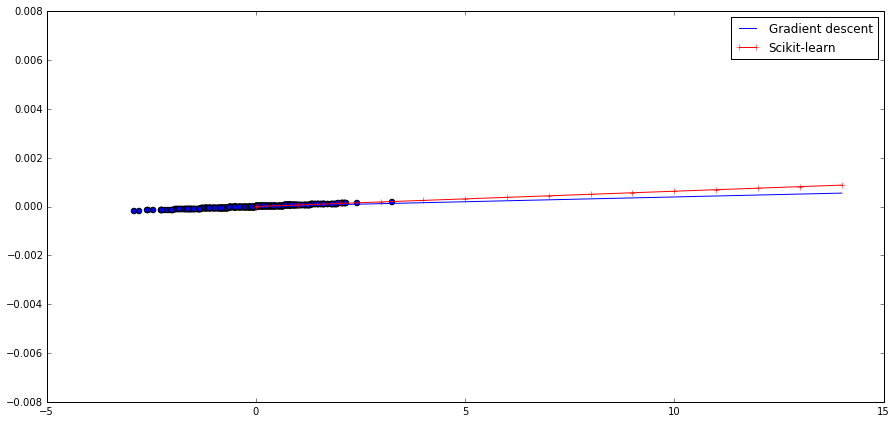

In [7]:
X = np.arange(0, 15)
Y = param[0] + param[1] * X

fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(x[:, 1], y, s = 30, c = 'b', linewidths = 1)
ax.plot(X, Y, label='Gradient descent', 
          c = 'b')
ax.plot(X, regr.intercept_ + regr.coef_ * X, 
          label='Scikit-learn', marker = '+',c = 'r')
ax.legend()
